# ICS 235 Homework Assignment 5
# <span style="color:red">Due: 12 PM on Wednesday, November 29</span>

## Instructions

1. Name your notebook file using your last and first name as presented in Laulima.
    - For example, Kay, Baek ==> baek_kay_5.ipynb (The number at the end is the assignment number.)
2. Only use .ipynb file extensions. Other extensions (file formats) like .rtf, .zip, .docs, .pdf are not accepted.
3. Data files will be available to the instructor, so no need to upload them to Laulima. Make sure you use the same filenames of data files as given in the homework.
4. Save data files in **"data" folder under your working directory**. Use **relative path** when you read in data in your code.
5. Do not create any subfolders in your Drop Box.
6. Clean your code before submission.
    - If needed, provide clear documentation describing the purpose and how to use every class or function in your code.
    - Your submission should show only the required outputs. 
7. Run your code before submission to **show all outputs**. 
8. Do not modify the provided code unless intructed to do so.
9. Write your full name in the cell below.
***

## Your Name: Michael Lee
***

# Exercise 1: Naive Bayes Classifier (70 points)

In this exercise, we will do some simple sentiment analysis on IMDB movie reviews. Given each viewer's comments, the goal is to determine whether the viewer had a positive or negative feeling about the movie.

## Loading the data

In [19]:
import pandas as pd

data = pd.read_csv("data/imdb.csv")

# Sample 10,000 at random for speed purposes
data = data.sample(10000, random_state=42)

data.head()

,review,sentiment
33553,I really liked this Summerslam due to the look...,positive
9427,Not many television shows appeal to quite as m...,positive
199,The film quickly gets to a major chase scene w...,negative
12447,Jane Austen would definitely approve of this o...,positive
39489,Expectations were somewhat high for me when I ...,negative


1. 1. Store the feature and target values in X and y respectively. (3 points)
   2. Split the data into training (70%), testing (20%) and validation (10%). Use a random state of 42 for both splits. (3 points)

In [20]:
# Your code

# 1.A
# Split data so that "X" is the review, and y is the sentiment
X = data['review']
y = data['sentiment']

# 1.B
from sklearn.model_selection import train_test_split
# Split X and y into 80% train and 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split X_train and y_train into 70% (87.5% of train) train and 10% test (12.5% of train)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

2. Encode the features using the tf-idf encoding scheme. In this exercise, we will limit the number of features to 500 for speed purposes. (See tf-idf [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) for more details about how to limit the number of features.) (7 points)

In [21]:
# Your code
from sklearn.feature_extraction.text import TfidfVectorizer
# Create a TfidfVectorizer that limits the number of features to 500
vect = TfidfVectorizer(max_features=500)
# Fit and transform model
X_train_vectorized = vect.fit_transform(X_train)
X_val_vectorized = vect.fit_transform(X_val)

3. 1. Implement a random guess function based on the **uniform distribution** to predict the sentiment. This will be our baseline for comparison with other predictive algorithms. (Do **NOT** use the `DummyClassifier` class. Implement your own function.) (6 points)
   2. Build a Naive Bayes Classifier to predict the sentiment using the tf-idf features. (5 points)
   3. Choose one other classification algorithm of your choice for comparison with the naive bayes. Make sure the algorithm can provide probabilities for each class. (5 points)
   4. For each of the three algorithms, compute the class probabilities of the validation set and store it in a dictionary. (The keys should be the algorithm name and the values are the probability of the sentiment being positive.) (6 points)

In [22]:
# Your code

# 3.A
import random as rand
# Function that guesses if it is positive or negative randomly
def random_guess(iterable):
    # Create an array to return all the values
    positive_percent_array = []
    for iter in iterable:
        # Generate a random number within the range [0, 1) in a uniform distribution
        random_percent = rand.random()
        #  Place generated number into array
        positive_percent_array.append(random_percent)
    # Return the array
    return positive_percent_array

# 3.B
from sklearn.naive_bayes import BernoulliNB
# Create Bernoulli Navie Bayes model
bnb_clf = BernoulliNB()
# Fit model based on training data
bnb_clf.fit(X_train_vectorized, y_train)

# 3.C
from sklearn.ensemble import RandomForestClassifier
# Create random forest model
random_forest = RandomForestClassifier()
# Fit model
random_forest.fit(X_train_vectorized, y_train)

# 3.D
# Predict the sentiment using random guesses
random_guesses = random_guess(X_val)
# Predict the sentiment using the Bernoulli Naive Bayes Model
bnb_guesses_proba = bnb_clf.predict_proba(X_val_vectorized)
# Predict the sentiment using a random forest
rf_guesses_proba = random_forest.predict_proba(X_val_vectorized)
# Create a dictionary to store class probabilties fo the validation set
class_prob = {
    "rand": random_guesses,
    "bnb":  bnb_guesses_proba[:,1],
    "rf":   rf_guesses_proba[:,1]    
}

4. 1. Build and evaluate the convergence speed (# of epochs) and accuracy of a neural network classifier on the validation set with varying values of the learning rate (`[1e-4, 1e-3, 1e-2, 1e-1, 5e-1, 1, 10]`). Print the accuracy and the number of epochs for each learning rate. In your implementation, keep the default hyperparameter of the MLPClassifier, except for the following: (8 points)
      - `early_stopping` = True
      - `solver` = 'sgd'
      - `random_state` = 42   
   2. What is the best learning rate? Explain. (4 points)
   3. Why does the accuracy drop when the learning rate is 10? (4 points)
   4. Compute the class probabilities of the validation set for the best network (the network trained with the best learning rate found in Question B, and the same hyperparameters as in Question A) and add it to the dictionary that you created in Question 3 above. (Use "mlp" as the key.) The values are the probability of the sentiment being positive. (4 points)

In [23]:
# Your code for 4.A
from sklearn.neural_network import MLPClassifier
# Create an array containing the multiple values of the learning rate
learning_rate_values = [1e-4, 1e-3, 1e-2, 1e-1, 5e-1, 1, 10]
for learning_rate in learning_rate_values:
    # Create a MLP Classifer for each learning rate
    mlp = MLPClassifier(learning_rate_init=learning_rate, early_stopping=True, solver='sgd', random_state=42)
    # Train the classifer
    mlp.fit(X_train_vectorized, y_train)
    # Print out accuaracy and epochs for each learning rate
    print("Learning rate: %f" % learning_rate)
    print("Accuracy: %.3f" % mlp.score(X_val_vectorized, y_val))
    print("Epochs: %i\n" % mlp.n_iter_)    

Learning rate: 0.000100
Accuracy: 0.488
Epochs: 12

Learning rate: 0.001000
Accuracy: 0.613
Epochs: 81

Learning rate: 0.010000
Accuracy: 0.611
Epochs: 103

Learning rate: 0.100000
Accuracy: 0.603
Epochs: 31

Learning rate: 0.500000
Accuracy: 0.601
Epochs: 19

Learning rate: 1.000000
Accuracy: 0.619
Epochs: 12

Learning rate: 10.000000
Accuracy: 0.512
Epochs: 12



> **Your answer (4.B)**: The best learning rate is when the learning rate is 1. This is because at this point, the accuracy is the highest. This is also the point where the number of epochs is 12, which is relativly fast compared to the other learning rates.

> **Your answer (4.C)**: The accuracy drops when the learning rate is 10, because at this point the learning rate is too high. This causes that the learning step is too great and overshoots the minimum value. Eventually, the steps will bounce between two points where it will then stop, due to early stopping.

In [24]:
# Your code for 4.D
# Create a MLP Classifer based on the optimal learning rate
optimal_mlp = MLPClassifier(learning_rate_init=1, early_stopping=True, solver='sgd', random_state=42)
# Fit the model
optimal_mlp.fit(X_train_vectorized, y_train)
# Predict the probability of each classes using the optimal MLP Classifer
optimal_mlp_guesses_proba = optimal_mlp.predict_proba(X_val_vectorized)
# Add probability to dictionary
class_prob["mlp"] = optimal_mlp_guesses_proba[:,1]

5. 1. Using the dictionary containing the class probabilities estimated by the four algorithms, draw ROC curves for all four algorithms in a single plot. Add a legend indicating the algorithm and the AUC value for each curve. (10 points)
   2. What threshold should we set if we want 80% recall with the Naive Bayes Classifier? Show the TPR and FPR for the threshold found. (5 points)

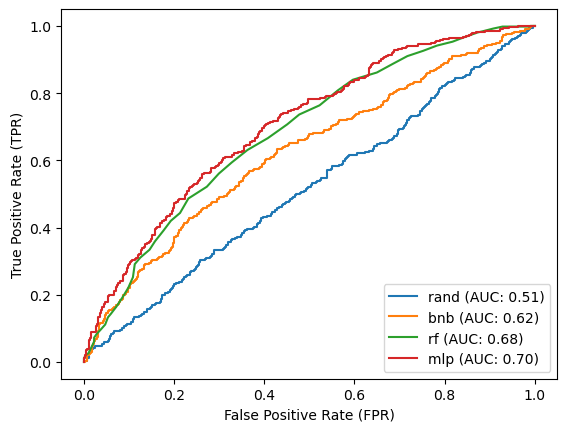

Threshold: 0.27
TPR: 0.80
FPR: 0.68


In [25]:
# Your code

# 5.A
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import numpy as np
for model in class_prob:
    # Calculate the fpr, tpr, and threshold
    fpr, tpr, threshold = metrics.roc_curve(y_val, class_prob[model], pos_label="positive")
    # Calculate the AUC
    roc_auc = metrics.auc(fpr, tpr)
    # Plot the graph
    plt.plot(fpr, tpr, label = "%s (AUC: %0.2f)" % (model, roc_auc))
# Add legend and axis-labels for graph    
plt.legend(loc = 'lower right')    
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.show()

# 5.B
from sklearn.model_selection import cross_val_predict
# Calculate the probability of the class
y_prob = cross_val_predict(bnb_clf, X_val_vectorized, y_val, cv=3, method='predict_proba')
# Calculate the precision, recall, and threshold
precisions, recalls, threshold_precision_recall = metrics.precision_recall_curve(y_val, class_prob["bnb"], pos_label="positive")
# Find the threshold at which the recall is ~80%
idx_recall  = np.where(recalls[:-1] <= .8)[0][0]
print("Threshold: %.2f" % threshold_precision_recall[idx_recall])
# Find the fpr and fpr at which recall is ~80%
fpr, tpr, threshold_tpr_fpr = metrics.roc_curve(y_val, class_prob["bnb"], pos_label="positive")
# Print out TPR and FPR
idx_tpr = np.where(tpr[:-1] >= .8)[0][0]
# TPR should be .80 since tpr and recall are the same
print("TPR: %.2f" % tpr[idx_tpr])
print("FPR: %.2f" % fpr[idx_tpr])




# Exercise 2: Autoencoder network (30 points)

In this exercise, we are going to re-use the TCGA dataset from homework \#4. We will see that neural network can also solve unsupervised problems. To do so, we are going to implement a simple autoencoder to extract 2 components from our  features (similar to PCA components). An autoencoder network takes as input some features, and tries to predict those same features. The architecture of the network will impose constraints which makes the recovery of the initial values not trivial. In our case, we will use a single hidden layer with 2 neurons: Thus, the network needs to encode the information from about 9,000 selected features into 2 values, and then reconstruct as best as possible those ~9,000 feature values from those 2 values (see figure below). Intuitively, if the network is accurate at reconstructing the original values, then the hidden layer should encode meaningful values about our samples.

<img src="autoencoder.png" width="400">

## Loading the data

In [26]:
import pandas as pd

X = pd.read_csv("data/tcga.csv", index_col=0, low_memory=False)
X = X.loc[:, X.std() > 1]    # Filter the data
y = pd.read_csv("data/tcga_labels.csv", index_col=0).Class

1. Standardize the feature matrix. (2 points)

In [27]:
# Your code
from sklearn.preprocessing import StandardScaler
# Create scalar
scalar = StandardScaler()
# Scale data
X_scaled_tcga = scalar.fit_transform(X)
print(X.shape)

(801, 9213)


2. Apply PCA with 2 principal components to the scaled data and do the scatter plot of the data transformed into the 2D space formed by the first two principal components. Color each sample according to their class labels. (5 points)

Text(0, 0.5, 'Principal Component Two')

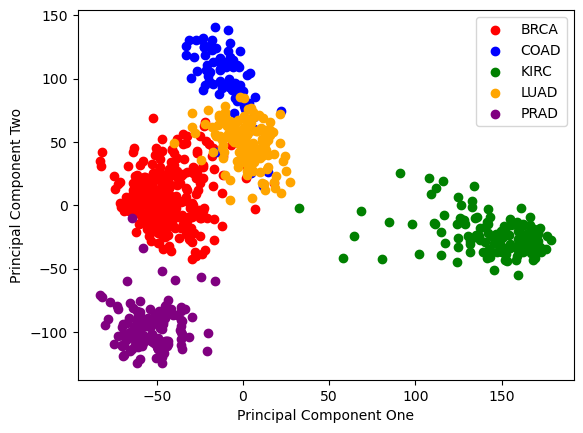

In [28]:
# Your code
from sklearn.decomposition import PCA
# Create PCA
pca_tgca = PCA(n_components=2)
# Fit data to PCA 
pca_tgca_data = pca_tgca.fit_transform(X)

# Seperate data into pricipal components
scatter_x = pca_tgca_data[:,0]
scatter_y = pca_tgca_data[:,1]
# Create a dictonary containing the colors
color_dict = {"BRCA": "red",
              "COAD": "blue",
              "KIRC": "green",
              "LUAD": "orange",
              "PRAD": "purple"}
# Create plot
fig, ax = plt.subplots()
# Plot points and color
for label in np.unique(y):
    idx = np.where(y == label)
    ax.scatter(scatter_x[idx], scatter_y[idx], c=color_dict[label], label=label)
# Add legend and axis-labels
ax.legend()
plt.xlabel("Principal Component One")
plt.ylabel("Principal Component Two")

3. 1. Train a regression neural network with a 2-neuron hidden layer on the scaled data. Do not use the target values (y) in the training, but do it in an unsupervised manner as described in the introduction of this exercise. Use the identity activation function and a random state of 42. (5 points)
   2. How many parameters are fitted with this architecture? (Do not compute it manually. Write a code to calculate it using the attributes of the trained network.) (5 points)

In [29]:
# Your code

# 3.A
from sklearn.neural_network import MLPRegressor
# Hidden later nuerons
n_hidden = 2
# Create regression neural network
tcga_mlp = MLPRegressor(hidden_layer_sizes=(n_hidden), activation="identity", random_state=42)
# Train neural network
tcga_mlp.fit(X_scaled_tcga, X_scaled_tcga)

# 3.B
# Calculate the number of weights
number_of_weights = (tcga_mlp.n_features_in_ * n_hidden) + (n_hidden * tcga_mlp.n_outputs_)
# Calculate number of parameter (# weights + bias terms)
number_of_parameters = number_of_weights + n_hidden + tcga_mlp.n_outputs_
print("There are %i number of parameters in this architecture." % number_of_parameters)

There are 46067 number of parameters in this architecture.


4. 1. Compute the hidden representation of each sample. It should be a N_samples-by-2 dimensional array. (7 points)
   2. Plot the 2D representation of the data computed above and color them by cluster label. (4 points)
   3. Compare the 2D representate found by the neural network (plot from Question 4.B) with the representation in the 2D PCA space (plot in Question 2). Are the samples from same class clustered similarly in both representations? (2 points) 

Text(0, 0.5, 'Principal Component Two')

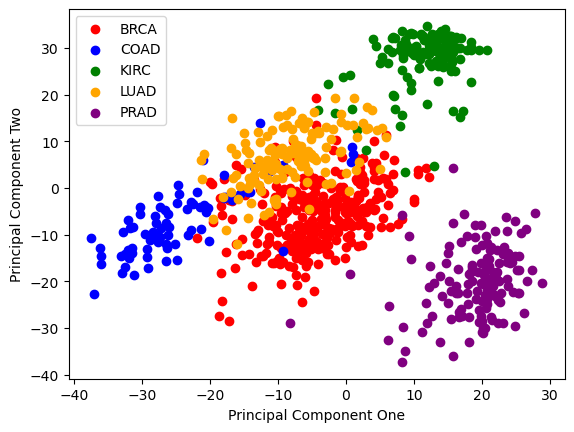

In [30]:
# Your code

# 4.A
# Calculate the values based on the function h(x) = f(Wx+b)
# f(x) returns x since the activation function was "identity"
hidden_representation = np.matmul(X_scaled_tcga, tcga_mlp.coefs_[0]) + tcga_mlp.intercepts_[0]

# 4.B
# Seperate data into two parts
hidden_representation_X = hidden_representation[:,0]
hidden_representation_y = hidden_representation[:,1]
# Creat plot
fig, ax = plt.subplots()
for label in np.unique(y):
    idx = np.where(y == label)
    ax.scatter(hidden_representation_X[idx], hidden_representation_y[idx], c=color_dict[label], label=label)
# Add legend and axis-labels
ax.legend()
plt.xlabel("Principal Component One")
plt.ylabel("Principal Component Two")


> **Your answer (4.C)**: I believe that the classes are clustered is a somewhat similar manner. If we look at the values labels KIRC and PRAD, in both graphs they are clearly seperated from the other labels. Additionally, the labels BRCA and LUAD appear to be in a similar location. There are just two noticible differences which is that the COAD values looks to be on the wrong side of the BRCA and LUAD values, and that the values on the axises being different.